In [3]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle
import ROOT
import math
import numpy as np
import sys
import glob
sys.path.append('/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/python_tools')
from ROOT_tools import ROOT_tools
from MultiPlotter import MultiPlotter
from ROOT2Pandas import Converter
from SampleManager import Sample, Manager
tool = ROOT_tools()

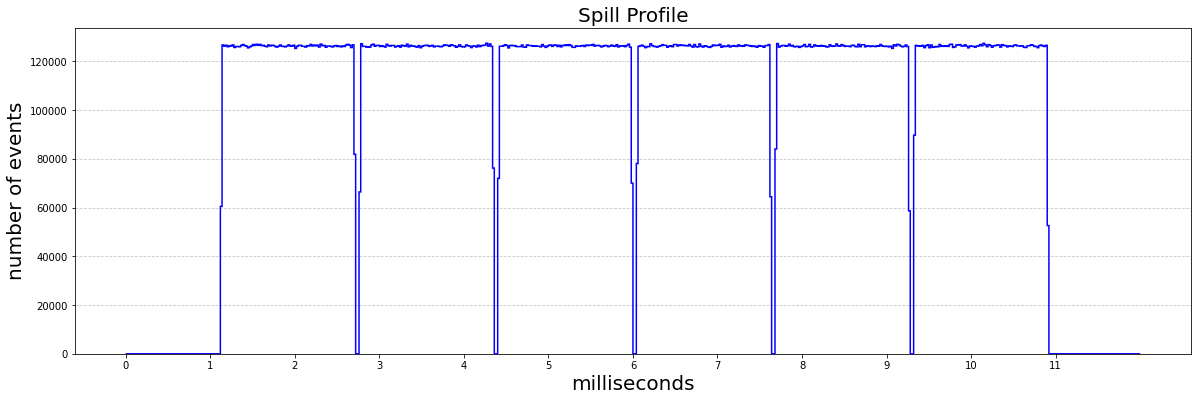

In [201]:
file = "/storage/gpfs_data/neutrino/users/gi/prod-scripts/spill_profile.root"
hist = upr.open(file)['spill_profile;1']

# Estrai i dati dell'istogramma
# `values` contiene i conteggi nei bin e `edges` contiene i bordi dei bin
values = hist.values()  # Conteggi nei bin
edges = hist.axis().edges()         # Bordi dei bin

# Calcola le posizioni centrali dei bin per il plotting
bin_centers = (edges[:-1] + edges[1:]) / 2

# Crea il grafico
plt.figure(figsize=(20, 6))
plt.hist(edges[:-1]*1e6, bins=edges*1e6, weights=values, histtype='step', color='blue', linewidth=1.5)
plt.xlabel("milliseconds", fontsize=20)
plt.ylabel("number of events", fontsize=20)
plt.title("Spill Profile", fontsize=20)
plt.xticks(np.arange(0,12))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostra il grafico
plt.show()

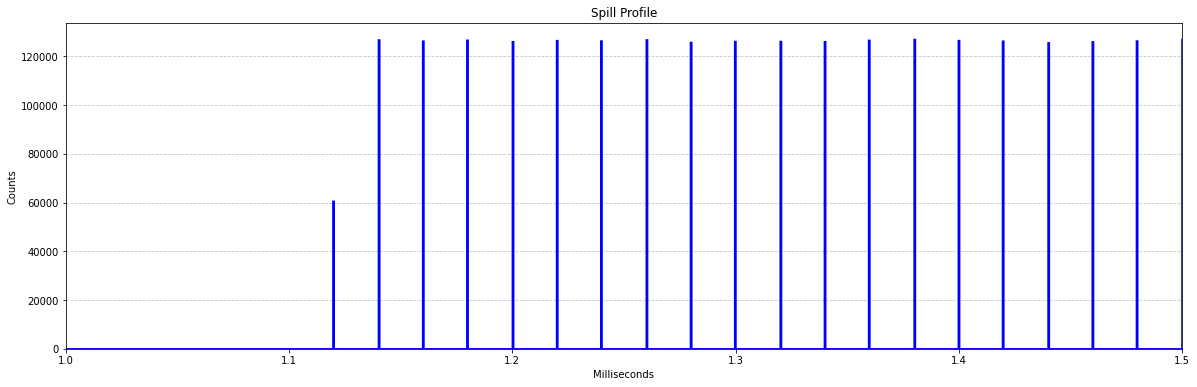

In [2]:
file = "/storage/gpfs_data/neutrino/users/gi/prod-scripts/spill_profile.root"
hist = upr.open(file)['spill_profile;1']

# Estrai i dati dell'istogramma
values = hist.values()              # Conteggi nei bin
edges = hist.axis().edges()         # Bordi dei bin

# Calcola il range complessivo
range_min, range_max = edges[0], edges[-1]

# Definisci il nuovo numero di bin e calcola i nuovi bordi
n_bins_new = 20000
new_edges = np.linspace(range_min, range_max, n_bins_new + 1)  # +1 perché gli edges includono anche il bordo destro

# Ribinna i valori esistenti ai nuovi bordi dei bin
new_values, _ = np.histogram(edges[:-1], bins=new_edges, weights=values)

# Crea il grafico con i dati ribinnati, scalando gli edge dei bin per mostrare millisecondi
plt.figure(figsize=(20, 6))
plt.hist(new_edges[:-1]*1e6, bins=new_edges*1e6, weights=new_values, histtype='step', color='blue', linewidth=1.5)
plt.xlabel("Milliseconds")
plt.ylabel("Counts")
plt.title("Spill Profile")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlim(1,1.5)
# Mostra il grafico
plt.show()

In [2]:
pdg_to_name = {
    12: "neutrino_e",
    14: "neutrino_mu",
    13: "muon",
    13: "muon",
    2112: "neutron",
    2212: "proton",
    211: "pi+-",
    111: "pi0",
    22: "photon",
    11: "e+-",
    311: "K0",
    321: "K+-",
    213: "rho+-",
}

def pdg_to_particle_name(pdg_series):
    return pdg_series.map(pdg_to_name).fillna("other")

In [4]:
file_trj = "/storage/gpfs_data/neutrino/users/gi/sand-physics/production_spill_reverse_volSAND/SAND_opt3_DRIFT1_reverse_volSAND/sand-drift-events.0.to.10.analysed.trj.root"
file_cells = "/storage/gpfs_data/neutrino/users/gi/sand-physics/production_spill_reverse_volSAND/SAND_opt3_DRIFT1_reverse_volSAND/sand-drift-events.0.to.10.analysed.cells.root"

In [5]:
converter_trj = Converter([file_trj], "trajectories")
converter_cells = Converter([file_cells], "cells")

In [6]:
columns_trajectories = [
    "trajectories_spill_number",
    "trajectories_id",
    "trajectories_pdg",
    # "trajectories_name",
    # "trajectories_starting_volume",
    "trajectories_ecal_edep",
    "trajectories_earliest_hit_ecal",
    "trajectories_latest_hit_ecal",
    "trajectories_TOF2ECAL",
]


In [7]:
trajectories = converter_trj.CreatePandas(
    columns = columns_trajectories,
    rename = True,
    indices = ['entry','subentry']
).droplevel(level=2).rename_axis(index={'entry': 'spill', 'subentry': 'index'})

trajectories['particle_name'] = pdg_to_particle_name(abs(trajectories['trajectories_pdg']))
trajectories

DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_spill_reverse_volSAND/SAND_opt3_DRIFT1_reverse_volSAND/sand-drift-events.0.to.10.analysed.trj.root has MultiIndex structure, keeping entry and subentry as columns


trajectories_spill_number  trajectories_id  trajectories_pdg  \
spill index                                                                 
0     0                              0                0               -13   
      1                              0                1              2212   
      2                              0                2              2112   
      3                              0                3              -211   
      4                              0                4              2212   
...                                ...              ...               ...   
89    6746                           6             6746                22   
      6747                           6             6747               -11   
      6748                           6             6748                11   
      6749                           6             6749                11   
      6750                           6             6750                11   

             trajectories_ecal_edep  trajectories_earliest_hit_ecal_x  \
spill index                                                             
0     0                    2.337560                            -999.0   
      1                    0.000000                            -999.0   
      2                    0.303353                            -999.0   
      3                    0.000000                            -999.0   
      4                    0.000000                            -999.0   
...                             ...                               ...   
89    6746                 0.000000                            -999.0   
      6747                 0.000000                            -999.0   
      6748                 0.000000                            -999.0   
      6749                 0.000000                            -999.0   
      6750                 0.000000                            -999.0   

             trajectories_earliest_hit_ecal_y  \
spill index                                     
0     0                                -999.0   
      1                                -999.0   
      2                                -999.0   
      3                                -999.0   
      4                                -999.0   
...                                       ...   
89    6746                             -999.0   
      6747                             -999.0   
      6748                             -999.0   
      6749                             -999.0   
      6750                             -999.0   

             trajectories_earliest_hit_ecal_z  \
spill index                                     
0     0                                -999.0   
      1                                -999.0   
      2                                -999.0   
      3                                -999.0   
      4                                -999.0   
...                                       ...   
89    6746                             -999.0   
      6747                             -999.0   
      6748                             -999.0   
      6749                             -999.0   
      6750                             -999.0   

             trajectories_earliest_hit_ecal_t  trajectories_latest_hit_ecal_x  \
spill index                                                                     
0     0                                -999.0                          -999.0   
      1                                -999.0                          -999.0   
      2                                -999.0                          -999.0   
      3                                -999.0                          -999.0   
      4                                -999.0                          -999.0   
...                                       ...                             ...   
89    6746                             -999.0                          -999.0   
      6747                             -999.0           

In [8]:
trajectories_manager = Manager(trajectories, "trajectories", reference_index="spill")

In [9]:
trajectories_manager.DefineSample("ecal_trajectories", "trajectories_ecal_edep > 0.1")
trajectories_manager.DefineSample("neutrons_trajectories", "trajectories_ecal_edep > 0.1 & trajectories_pdg == 2112")

In [10]:
ecal_trajectories = trajectories_manager.GetSample("ecal_trajectories")
neutrons_trajectories = trajectories_manager.GetSample("neutrons_trajectories")

In [11]:
nof_tracks_in_ECAL_per_spill = ecal_trajectories.dataframe.groupby(['spill',"particle_name"]).size().reset_index(name='nof_tracks_in_ECAL')

In [17]:
nof_tracks_in_ECAL_per_spill.groupby("particle_name").size()

particle_name
K+-        49
e+-        85
muon       90
neutron    90
other      54
photon     90
pi+-       90
proton     89
dtype: int64

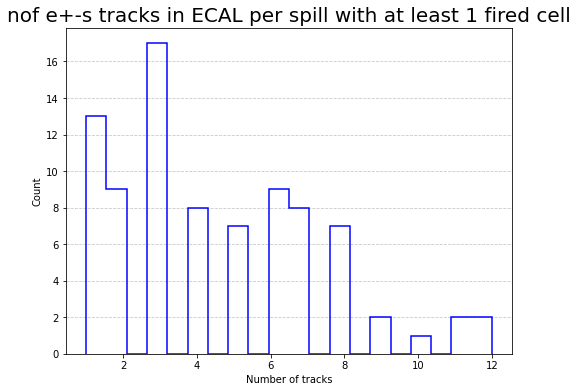

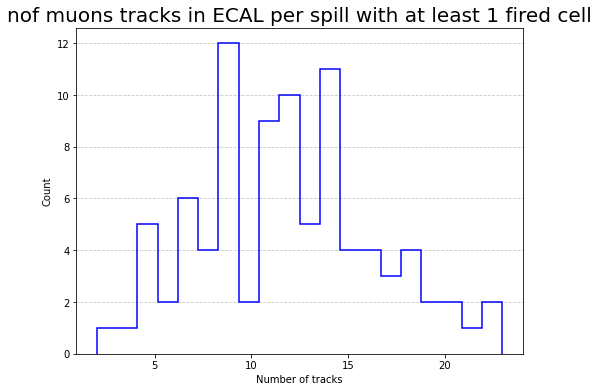

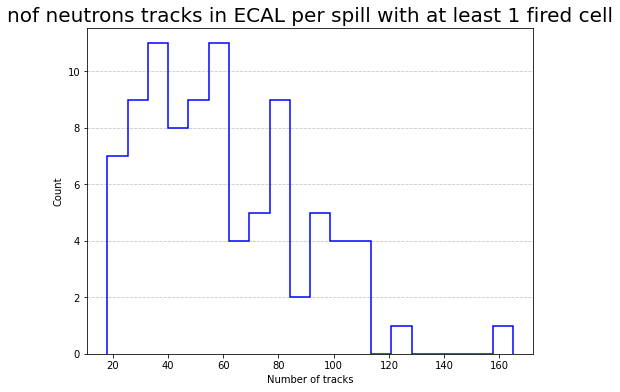

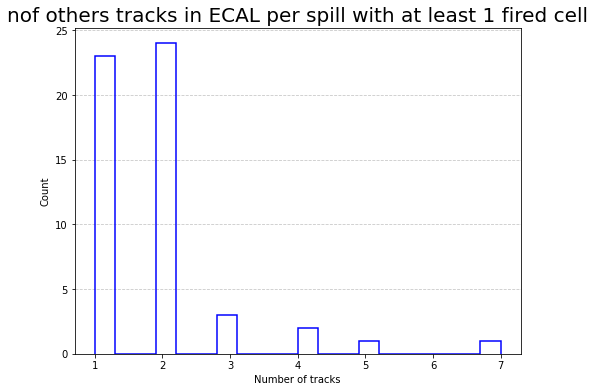

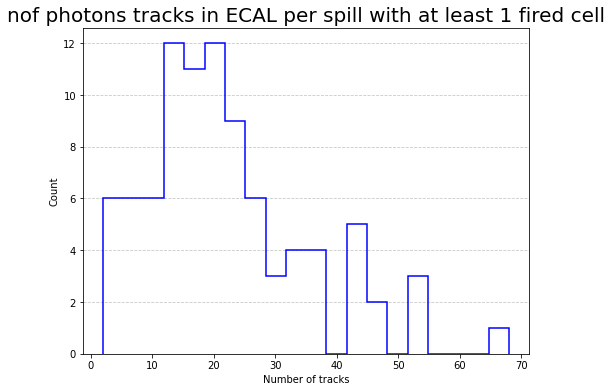

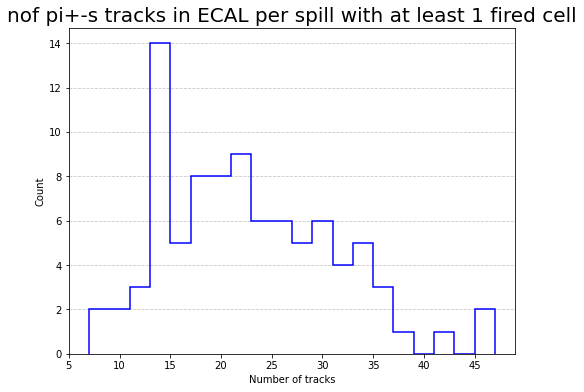

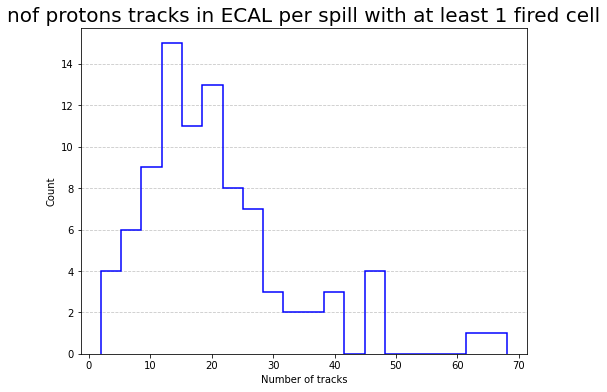

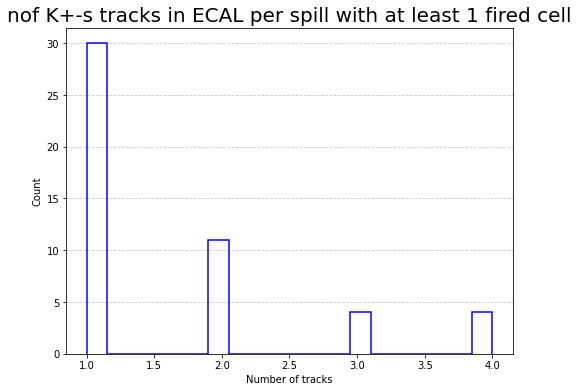

In [15]:
unique_categories = nof_tracks_in_ECAL_per_spill['particle_name'].unique()

# Cicla su ciascuna categoria e plotta un istogramma
for category in unique_categories:
    # Filtra i dati per la categoria corrente
    category_data = nof_tracks_in_ECAL_per_spill[nof_tracks_in_ECAL_per_spill['particle_name'] == category]['nof_tracks_in_ECAL']
    
    # Crea un nuovo grafico per ogni categoria
    plt.figure(figsize=(8, 6))
    plt.hist(category_data, bins=20, histtype='step', color='blue', linewidth=1.5)
    plt.title(f"nof {category}s tracks in ECAL per spill with at least 1 fired cell", fontsize=20)
    plt.xlabel("Number of tracks")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

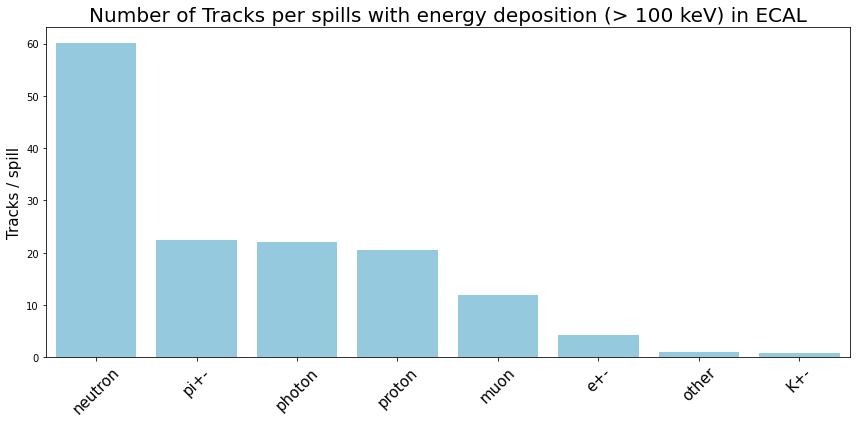

In [49]:
# Supponiamo che il tuo DataFrame si chiami df

# Raggruppa per 'spill' e 'particle_name' e conta le occorrenze
total_nof_spills_simulated = 90

counts = ecal_trajectories.dataframe.groupby(['spill', 'particle_name']).size().reset_index(name='count')

total_counts = counts.groupby('particle_name')['count'].sum().reset_index()

total_counts["count_per_spill"] = total_counts['count'] / total_nof_spills_simulated

total_counts = total_counts.sort_values(by='count_per_spill', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=total_counts, x='particle_name', y='count_per_spill', color='skyblue')

plt.title('Number of Tracks per spills with energy deposition (> 100 keV) in ECAL', fontsize = 20)
plt.xlabel('')
plt.ylabel('Tracks / spill', fontsize = 15)
plt.xticks(fontsize = 15, rotation = 45)
plt.tight_layout()



In [24]:
columns_cells = [
    # "file_name",
    "spill_number",
    "cell_mod",
    "cell_id",
    "cell_x",
    "cell_y",
    "cell_z",
    "is_complete",
    "track_id_pmt1_hit",
    "track_id_pmt2_hit",
    "track_pdg_pmt1_hit",
    "track_pdg_pmt2_hit",
    "true_hit1",
    "true_hit2",
    "true_edep1",
    "true_edep2",
    "reco_hit",
    "reco_edep",
]

In [25]:
cells = converter_cells.CreatePandas(
    columns = columns_cells,
    rename = True,
    indices = ['entry','subentry']
).droplevel(level=2).rename_axis(index={'entry': 'spill', 'subentry': 'index'})

cells

DataFrame from file /storage/gpfs_data/neutrino/users/gi/sand-physics/production_spill_reverse_volSAND/SAND_opt3_DRIFT1_reverse_volSAND/sand-drift-events.0.to.10.analysed.cells.root has MultiIndex structure, keeping entry and subentry as columns


spill_number  cell_mod  cell_id        cell_x   cell_y  \
spill index                                                           
0     0                 6        40   140002 -1.712000e+03 -2384.73   
      1                 6        40   140003 -1.712000e+03 -2384.73   
      2                 6        40   140011 -1.712000e+03 -2384.73   
      3                 6        40   140110 -1.756000e+03 -2384.73   
      4                 6         0   200005  4.696243e-13  -362.73   
...                   ...       ...      ...           ...      ...   
89    831               8        30   330402  1.893000e+03 -2384.73   
      832               8        30   330404  1.893000e+03 -2384.73   
      833               8        30   330405  1.893000e+03 -2384.73   
      834               8        30   330406  1.893000e+03 -2384.73   
      835               8        30   330407  1.893000e+03 -2384.73   

                   cell_z  is_complete  track_id_pmt1_hit  track_id_pmt2_hit  \
spill index                                                                    
0     0      22021.111111            1                334                334   
      1      22065.555556            0                334                334   
      2      22421.111111            1                334                334   
      3      22376.666667            1                334                334   
      4      23932.120688            1                130                130   
...                   ...          ...                ...                ...   
89    831    25798.888889            1                169                169   
      832    25710.000000            1                 34                 34   
      833    25665.555556            0                 34                 34   
      834    25621.111111            1                416                416   
      835    25576.666667            1                 59                 59   

             track_pdg_pmt1_hit  ...  true_hit2_y   true_hit2_z  true_hit2_t  \
spill index                      ...                                           
0     0                     211  ... -2655.906965  22027.419432  7080.948511   
      1                     211  ...  -999.000000   -999.000000  -999.000000   
      2                     211  ... -2401.103454  22402.384452  7149.294908   
      3                     211  ... -2397.070657  22382.690335  7156.808452   
      4                      22  ...  -380.934529  23934.023039  3922.552772   
...                         ...  ...          ...           ...          ...   
89    831                  2112  ... -2236.487863  25786.709814  3512.324511   
      832                  2112  ... -1740.980223  25698.561001  2251.686511   
      833                  2112  ...  -999.000000   -999.000000  -999.000000   
      834                   211  ... -2444.574364  25602.856287  6475.969764   
      835                  2112  ... -1403.769025  25584.350224  2017.201463   

             true_edep1  true_edep2   reco_hit_x   reco_hit_y    reco_hit_z  \
spill index                                                                   
0     0        1.077140    1.077140 -1712.000000 -2375.405400  22021.111111   
      1     -999.000000 -999.000000  -999.000000  -999.000000   -999.000000   
      2        0.699242    0.699242 -1712.000000 -2342.083249  22421.111111   
      3        0.330639    0.330639 -1756.000000 -2412.948283  22376.666667   
      4        0.115499    0.115499    87.062821  -362.730000  23932.120688   
...                 ...         ...          ...          ...           ...   
89    831      0.062382    0.062382  1893.000000 -2451.448497  25798.888889   
      832      0.223657    0.223657  1893.000000 -2288.019049  25710.000000   
      833   -999.000000 -999.000000  -999.000000  -999.000000   -999.000000   
      834      0.289397    0.289397  1893.000000 -2297.669893  25621.111111   
      835      0.451562    0.451562  1893.000000 -2276.6971

In [26]:
cells_manager = Manager(cells, "cells", reference_index="spill")

In [32]:
cells_manager.DefineSample("cells_fired_by_one_trajectory", "(track_id_pmt1_hit == track_id_pmt2_hit) & true_edep1 > 0.01")

In [33]:
cells_fired_by_on_trajectory = cells_manager.GetSample("cells_fired_by_one_trajectory")
cells_fired_by_on_trajectory.dataframe['track_pdg_pmt1_hit'] = pdg_to_particle_name(abs(cells_fired_by_on_trajectory.dataframe['track_pdg_pmt1_hit']))

/home/NEUTRINO/gianfrancoingratta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


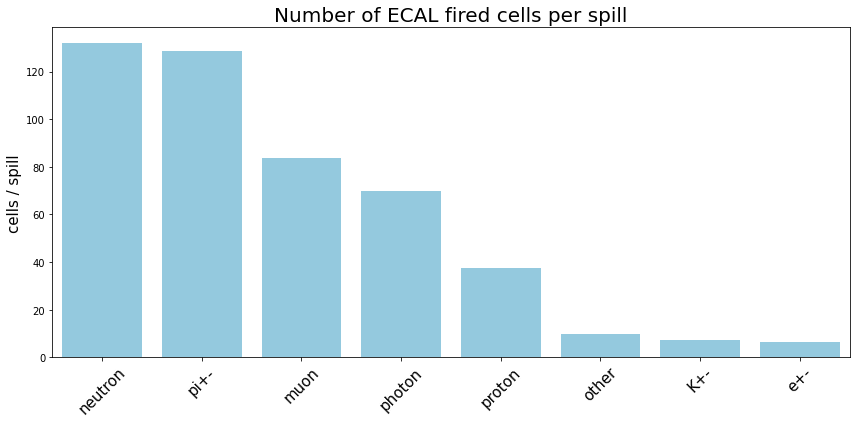

In [43]:
counts = cells_fired_by_on_trajectory.dataframe.groupby(['spill', 'track_pdg_pmt1_hit']).size().reset_index(name='count')

total_counts = counts.groupby('track_pdg_pmt1_hit')['count'].sum().reset_index()

total_counts['count_per_spill'] = total_counts['count'] / total_nof_spills_simulated

total_counts = total_counts.sort_values(by='count_per_spill', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=total_counts, x='track_pdg_pmt1_hit', y='count_per_spill', color='skyblue')
plt.xlabel("")
plt.title('Number of ECAL fired cells per spill', fontsize = 20)
plt.ylabel('cells / spill', fontsize = 15)
plt.xticks(fontsize = 15, rotation=45)
plt.tight_layout()

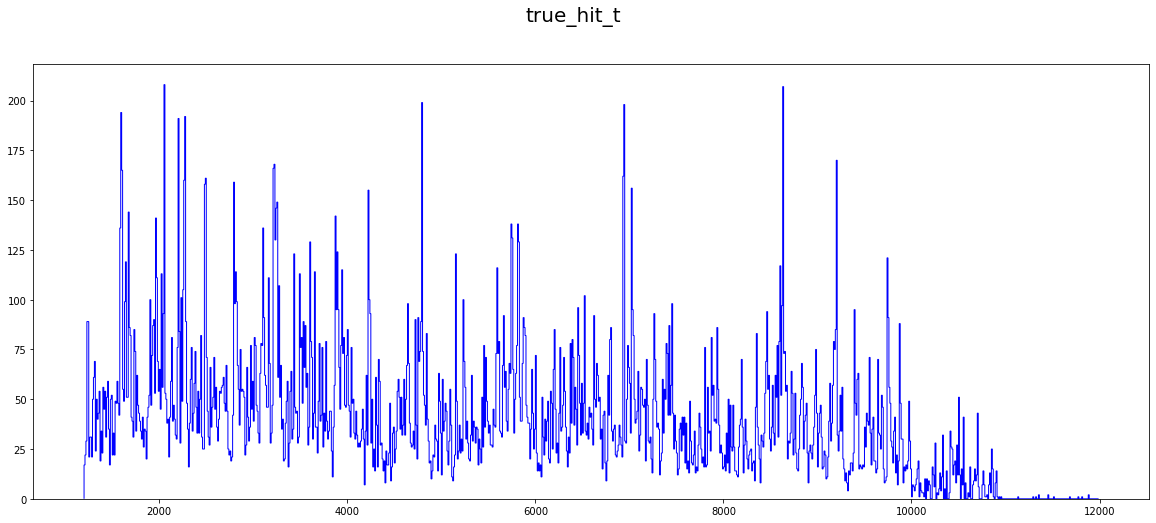

In [163]:
plotter = MultiPlotter(nrows=1, ncols=1, figsize=(20, 8), suptitle=r"true_hit_t")

plotter.plot_hist(
    data=cells_fired_by_on_trajectory.dataframe['true_hit1_t'],
    bins=np.arange(1200, 12000, 10),
    label='',
    color='blue',
)


In [164]:
cells_fired_by_on_trajectory.dataframe.columns

Index(['spill_number', 'cell_mod', 'cell_id', 'cell_x', 'cell_y', 'cell_z',
       'is_complete', 'track_id_pmt1_hit', 'track_id_pmt2_hit',
       'track_pdg_pmt1_hit', 'track_pdg_pmt2_hit', 'true_hit1_x',
       'true_hit1_y', 'true_hit1_z', 'true_hit1_t', 'true_hit2_x',
       'true_hit2_y', 'true_hit2_z', 'true_hit2_t', 'true_edep1', 'true_edep2',
       'reco_hit_x', 'reco_hit_y', 'reco_hit_z', 'reco_hit_t', 'reco_edep'],
      dtype='object')